First, we will reconstruct Figure 2 entitled "Form of the Ohmic and Debye Spectral Densities". We will consider the Ohmic spectral desity with an exponential cut-off and the Debye spectral density given by

\begin{align*}
    J(\omega) = \eta \omega e^{-\omega/\omega_c} \text{ }\,\,\text{ }\,\,\text{ and }\text{ }\,\,\text{ }\,\, J(\omega) = \dfrac{\eta\omega_c\omega}{\omega^2 + \omega_c^2},
\end{align*}
 
where $\eta$ is the coupling strength between the system and the bath and $\omega_c$ is the bath cut-off frequency.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Global parameters
# Notice that all of these parameters are given once delta is selected.

delta = 1                      # coupling of the two states
beta = 0.25/delta              # inverse of thermal energy
omega_c = delta                # bath cut-off frequency
varepsilon = 0                 # energy bias
eta = delta*0.01*np.pi/2       # coupling strength between the system and the bath
alpha = 0.1/delta              # Kondo parameter

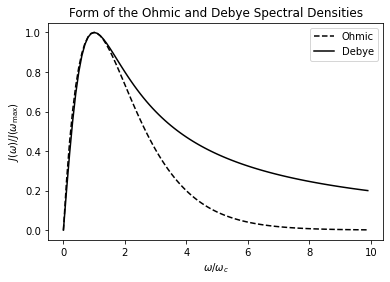

In [2]:
# define the spectral density functions
omega = np.arange(0,10,0.1)
ohmic = eta*omega*np.exp(-omega/omega_c)
debye = eta*omega_c*omega/(omega**2+omega_c**2)

# construct the plot
plt.plot(omega/omega_c,ohmic/ohmic.max(),"k--")
plt.plot(omega/omega_c,debye/debye.max(),"k-")
plt.xlabel("$\omega/\omega_c$")
plt.ylabel("$J(\omega)/J(\omega_\mathrm{max})$")
plt.legend(['Ohmic', 'Debye'])
plt.title('Form of the Ohmic and Debye Spectral Densities')
plt.show()

## System Evolution

We would like to evolve the system while holding the bath positions constant. We begin by writing the property from the system $\langle \Omega_s(t) | \hat{\sigma}_z | \Omega_s(t)\rangle$ as

$$ \langle \Omega_s(t) | \hat{\sigma}_z | \Omega_s(t)\rangle = c_{+1}(t)c_{+1}^*(t) - c_{-1}(t)c_{-1}^*(t). $$

This expression is inserted into the time-dependent Schödinger equation, 

$$ i \dfrac{\partial}{\partial t} | \Omega_s(s;t)\rangle = \left( \hat{H}_s - \hat{\sigma}_z H_c(Q) \right)| \Omega_s(s;t)\rangle, $$

to obtain the following system of differential equations

\begin{align*}
    i\dfrac{dc_{+1}(t)}{dt} &= c_{+1}(t)H_c^\prime + c_{-1}(t)\Delta\\
    i\dfrac{dc_{-1}(t)}{dt} &= c_{+1}(t)\Delta - c_{-1}(t)H_c^\prime.
\end{align*}

Notice that in the above expressions we have defined $H_c^\prime = -H_c + \varepsilon$. We could rewrite these equations in matrix form as 

\begin{align*}
    \dfrac{d}{dt} \begin{pmatrix} c_{+1}(t) \\ c_{-1}(t) \end{pmatrix} 
    = -i \begin{pmatrix} H_c^\prime & \Delta \\ \Delta & H_c^\prime \end{pmatrix} 
    \begin{pmatrix} c_{+1}(t) \\ c_{-1}(t) \end{pmatrix},
\end{align*}
or more compactly, 
\begin{align*}
    \dfrac{d}{dt}\vec{c} = -i \textbf{H}\vec{c} 
\end{align*}

As a side note, if this were the differential equation, $\frac{dy}{dx} = ay $, we would obtain the solution $y(x) = Ce^{ax}$. In our current situation, we can expect to get something similar:

\begin{align*}
    \vec{c}(t+\delta t) = e^{-i\textbf{H} \delta t}\vec{c}(t)
\end{align*}

Prior to exponentiating the Hamiltonian matrix $\textbf{H}$, we will first diagonalize it via a coordinate rotation. We therefore introduce the orthogonal matrix \textbf{S} which diagonalizes the Hamiltonian matrix. That is
\begin{align*}
    \textbf{S}^T \cdot \textbf{H} \cdot \textbf{S} = \textbf{D},
\end{align*}
where $\textbf{D}$ is diagonal. We should also recall the orthogonality condition requires that
$$\textbf{S}^T \cdot \textbf{S} = \textbf{S} \cdot \textbf{S}^T = I$$
We then rotate the coordinate system by using,

\begin{align*}
    \textbf{S}(\theta) = \begin{pmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{pmatrix}.
\end{align*}

We choose a value of $\theta$ such that $\textbf{D}$ is diagonal and obtain

\begin{align*}
    \cos(2\theta) = \dfrac{H_c^\prime}{\lambda} \text{ }\,\,\text{ }\,\,\text{ and }\text{ }\,\,\text{ }\,\, \sin(2\theta) = \dfrac{\Delta}{\lambda}.
\end{align*}

It follows that,

\begin{align*}
    1 = \cos^2(2\theta) + \sin^2(2\theta) = \dfrac{(H_c^\prime)^2 + \Delta^2}{\lambda^2},
\end{align*}

i.e. $\lambda = \sqrt{(H_c^\prime)^2 + \Delta^2}$. Putting this all together shows us that

\begin{align*}
    e^{-i\textbf{H}\delta t} = \textbf{S} \cdot e^{-i\textbf{D}\delta t} \cdot \textbf{S}^T,
\end{align*}

and we are now able to exponentiate the matrix and compute the matrix products. Doing this shows us that

\begin{align*}
    e^{-i\textbf{H}\delta t} = 
    \begin{pmatrix}  
        \cos(\lambda \delta t) - i\frac{H_c^\prime}{\lambda}\sin(\lambda \delta t) & -i \frac{\Delta}{\lambda}\sin(\lambda \delta t)\\
        -i \frac{\Delta}{\lambda}\sin(\lambda \delta t) & \cos(\lambda \delta t) + i\frac{H_c^\prime}{\lambda}\sin(\lambda \delta t)
    \end{pmatrix}
\end{align*}

We can now insert this exponentiated matrix into our solution to the differential equation to give the evolution equations for the coefficients for a given bath configuration:

\begin{align*}
    c_{+1}(t+\delta t) &= \left( \cos(\lambda \delta t) - i \dfrac{H_c^\prime}{\lambda} \right)c_{+1}(t) - i \dfrac{\Delta}{\lambda} \sin(\lambda \delta t)c_{-1}(t)\\
    c_{-1}(t+\delta t) &= \left( \cos(\lambda \delta t) + i \dfrac{H_c^\prime}{\lambda} \right)c_{-1}(t) - i \dfrac{\Delta}{\lambda} \sin(\lambda \delta t)c_{+1}(t)
\end{align*}

In [3]:
f = 5

# functions that compute cj and wj
def w(j):
    val = -omega_c*np.log((j-0.5)/f)
    return val

def c(j):
    val= w(j)*(2*eta*omega_c/(f*np.pi))**0.5
    return val

In [5]:
# create a bath of harmonic oscillators (no Wigner yet)
P = []           # momentum coordinates
Q = []           # position coordinates
rho_pqt = []     # density function rho(Pj,Qj;t)
c_list = []      # coefficients
w_list = []      # frequencies
prodRho = []     # composite density function
coupHam = []     # Hamiltonian for the couplings

# mean of both distributions will be zero
muP, muQ = 0.0, 0.0

frequency = np.zeros(f,float)
coupling_constants = np.zeros(f,float)
for i in range(0,f):
    frequency[i] = -omega_c*np.log(((j+1)-0.5)/f)
    coupling_constants[i] = frequency[i]*(2*eta*omega_c/(f*np.pi))**0.5


for i in range(0,f):
    coupling_constants[i] = 
    

# after a given P_j and Q_j are found, we can calculate rho(P_j, Q_j, t = 0)
def rho(p,q,w_j):
    H = -1*(p**2 + (q**2)*(w_j**2))*beta/2
    val = beta*w_j/(2*np.pi)*H 
    return val

# initialize all momenta and coordinates
ctr = 1
while(ctr<f+1):
    w_j = w(ctr)
    w_list.append(w_j)
    
    # stdev for P_j and Q_j
    sigmaP = (1/beta)**0.5
    sigmaQ = (1/(beta*(w_j**2)))**0.5
    
    # obtaining initial values from a gaussian distribution 
    p = np.random.normal(muP, sigmaP)
    q = np.random.normal(muQ, sigmaQ)
    P.append([p])
    Q.append([q])
    
    c_list.append(c(ctr))
    rho_pqt.append(rho(p,q,w_j))  # add to density function
    ctr += 1
    
print(P)
# multiply all of the elements in rho_initial together
prodRho.append(np.prod(rho_pqt))

value = 0
for i in range (len(c_list)):
    value += c_list[i]*Q[i][0]
coupHam.append(value)
    
print(P)
print(Q)
print(rho_pqt)
print(prodRho)
print(coupHam)
print(len(P))
print(len(c_list))

[[-0.8618910664132173], [0.4335392919547699], [0.2596288762900326], [-0.8372720385331341], [-0.30453551974038645]]
[[-0.8618910664132173], [0.4335392919547699], [0.2596288762900326], [-0.8372720385331341], [-0.30453551974038645]]
[[-0.36872509393566094], [-2.131714065781782], [-1.2680158236854502], [-20.4502899774125], [-1.902353738629532]]
[-0.021142107617566033, -0.021972860920806633, -0.001796338834461133, -0.04967792522114001, -0.00010772307318533075]
[-4.4657594812799195e-12]
[-0.1318051081219144]
5
5


## Integrators for the harmonic bath
Next, we will write code for the following position and momentum integrators:

\begin{align*}
    Q_j(t+\delta t/2) &= \left( Q_j(t) + \dfrac{c_j}{\omega_j^2}\langle \Omega_s(t) | \hat{\sigma}_z |  \Omega_s(t) \rangle \right) \cos(\omega_j \delta t/2) + P_j(t) \dfrac{\sin\left(\omega_j \delta t/2 \right)}{\omega_j} - \dfrac{c_j}{\omega_j^2}\langle \Omega_s(t) | \hat{\sigma}_z |  \Omega_s(t) \rangle\\
    P_j(t + \delta t/2) &= P_j(t)\cos(\omega_j \delta t/2) - \left( Q_j(t) + \dfrac{c_j}{\omega_j^2} \langle \Omega_s(t) |\hat{\sigma}_z| \Omega_s(t) \rangle\right) \omega_j \sin\left( \omega_j \delta t/2 \right).
\end{align*}

In [6]:
# time evolution of the bath
t = 0
dt = 0.1
ipz = []
ipz.append(1) # initial condition for the system

# use dtTemp as a dummy variable
# newIndex - 1 gives the last added element in the column

# momentum integrator
def incrementQP():
    rhoVector = []
    value = 0
    for i in range(len(P)):
        arg = w_list[i]*dt/2    # argument for the trig functions
        
        # get the previous values
        prevP = P[i][-1]
        prevQ = Q[i][-1]
        
        # compute the new ones
        newP = prevP*np.cos(arg)-(prevQ + c_list[i]/(w_list[i]**2)*ipz[-1])*w_list[i]*np.sin(arg)
        newQ = (prevQ + c_list[i]/(w_list[i]**2)*ipz[0])*np.cos(arg) + prevP*np.sin(arg)/w_list[i] - c_list[i]/(w_list[i]**2)*ipz[0]
        value += c_list[i]*newQ # new coupling Hamiltonian entry
        
        # store them
        P[i].append(newP)
        Q[i].append(newQ)
        
        # might as well get a quick density calc
        # tells us the distribution that we are using to draw our initial conditions
        rhoVector.append(rho(newP,newQ,w_list[i]))
      
    # multiply all the new densities together
    prodRho.append(np.prod(rhoVector))
    coupHam.append(value)
    

incrementQP()
incrementQP()
print(P)
print(Q)
print(rho_pqt)
print(prodRho)
print(coupHam)

[[-0.8618910664132173, -0.8373266235667709, -0.8099883090485472], [0.4335392919547699, 0.47128948882103233, 0.5086127442213887], [0.2596288762900326, 0.26681732870261526, 0.27392566237649885], [-0.8372720385331341, -0.8049182576538756, -0.7725004776370648], [-0.30453551974038645, -0.30432939034499534, -0.3041211495062376]]
[[-0.36872509393566094, -0.4112172706453004, -0.4524115199906814], [-2.131714065781782, -2.10909163830163, -2.0845922328056705], [-1.2680158236854502, -1.2548543392113356, -1.2413354261408662], [-20.4502899774125, -20.49134500684349, -20.530780736522768], [-1.902353738629532, -1.9175753701823377, -1.9327866424733002]]
[-0.021142107617566033, -0.021972860920806633, -0.001796338834461133, -0.04967792522114001, -0.00010772307318533075]
[-4.4657594812799195e-12, -4.473019003849295e-12, -4.4797145912112225e-12]
[-0.1318051081219144, -0.13267414787611387, -0.13347526902859422]


In [ ]:
# initial conditions for the system are given above when inputting ipz.append(1)
c_p1 = 1
c_m1 = 0

# cpc = c_+1* (c plus conjugate)




ipz = []
ipz.append(1)


In [ ]:
# split evolution method code
# let ipz be constant and call incrementQP()
# take Q to be constant and evolve ipz
# take ipz to be constant and call increment QP() again
# repeat for as long as you want the simulation to run for

# think about how long you want this to run for
def split():
    incrementQP()
    incrementIPZ()
    incrementQP()   

In [7]:
# two dimensional list practice
A = []
for i in range(5):
    A.append([i])
print(A)

for i in range(len(A)):
    A[i].append(i+1)

print(A)
print(A[0][0])
print(len(A[0]))
print(len(A))
ipz = []
ipz.append(1)
B = [1]
print(B[-1])

[[0], [1], [2], [3], [4]]
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]
0
2
5
1


In [16]:
# complex number stuff
c = 3+6j
b = 1 + 1j
print(c)
print(np.conj(c))
print(c*np.conj(c))
print(np.abs(c))


(3+6j)
(3-6j)
(45+0j)
6.708203932499369


In [18]:
print(complex(2,3))

(2+3j)
